In [1]:
import pandas as pd
import numpy as np
# import map_funcs
import sys
import seaborn as sns
import matplotlib.pyplot as plt
#import map_funcs
from IPython.display import Image
import csv



In [2]:
## Load data

data_dir = ('/Users/kathrynmurenbeeld/CODING/FATES/scgsr_traits/')

dat_photo = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_photo_v04.csv')
dat_dens = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_dens_v02.csv')
dat_fire = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_fire.csv')
dat_hydro = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_hydro.csv')

baad_dir = '/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/baad_downloads/baad_data/'
baad_df = pd.read_csv(baad_dir + 'baad_data_2.csv').reset_index() 

baad_df = baad_df.loc[(baad_df['species'] == 'Pinus ponderosa') | (baad_df['species'] == 'Pinus contorta') | (baad_df['species'] == 'Pinus monticola') | (baad_df['species'] == 'Pseudotsuga menzeisii') | (baad_df['species'] == 'Tsuga heterophylla') | (baad_df['species'] == 'Larix occidentalis') | (baad_df['species'] == 'Abies lasiocarpa') | (baad_df['species'] == 'Abies grandis') | (baad_df['species'] == 'Picea engelmanni') | (baad_df['species'] == 'Thuja plicata')].copy()
baad_df = baad_df[['species', 'location', 'h.t', 'd.bh', 'a.lf', 'a.cp', 'm.lf', 'ma.ilf', 'n.lf', 'm.so']].copy()

dat_photo.head(1)

,Common Name,Genus,Species,Latitude,Longitude,Altitude (m),Ecoregion,SLA,SLA units,SLA m2/g,...,Vcmax_units,Plant Organ,Canopy Position,Plant dbh,Plant Age,Plant Age Category,Measurement Methods,Reference,Reference DOI,Simulation Site
0,subalpine fir,Abies,lasiocarpa,NaN,NaN,NaN,ID,232.0,g/m2,0.00431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Remko A. Duursma, John D. Marshall, Jesse B. N...",NaN,NaN


In [3]:
# Convert the BAAD LMA to SLA and combine with the other SLA
baad_sla = (1/ (baad_df['ma.ilf'].dropna(axis=0).values) /1000)
len(baad_sla)
sla = dat_photo['SLA m2/g'].dropna(axis=0).values
print(len(baad_sla),len(sla))

127 524


In [4]:
sla = dat_photo['SLA m2/g'].dropna(axis=0).values
sla_combine = np.hstack((sla, baad_sla))
len(sla_combine)

651

In [5]:
# Also want the BAAD N/leaf

baad_nleaf = baad_df['n.lf'].dropna(axis=0).values

### Check the data and screen outliers (since data so sparse, outliers can skew the distribution)

Text(0.5, 1.0, 'P50 xylem')

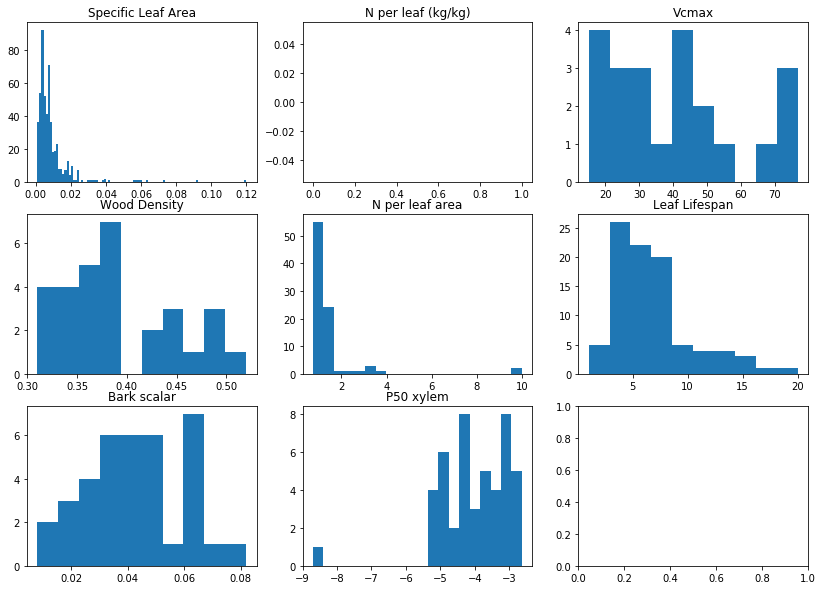

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

axs[0,0].hist(sla, bins = 100)
axs[0,0].set_title("Specific Leaf Area")
axs[0,1].hist(baad_nleaf, bins = 20)
axs[0,1].set_title("N per leaf (kg/kg)")
axs[0,2].hist(dat_photo['Vcmax'].dropna(axis=0).values, bins = 10)
axs[0,2].set_title("Vcmax")
axs[1,0].hist(dat_dens['Wood_density'].dropna(axis=0).values, bins = 10)
axs[1,0].set_title("Wood Density")
axs[1,1].hist(dat_photo['Leaf N'].dropna(axis=0).values, bins = 20)
axs[1,1].set_title("N per leaf area")
axs[1,2].hist(dat_photo['LEAF_LIFE_YR'].dropna(axis=0).values, bins = 10)
axs[1,2].set_title("Leaf Lifespan")
axs[2,0].hist(dat_fire['bark_scaler'].dropna(axis=0).values, bins = 10)
axs[2,0].set_title("Bark scalar")
axs[2,1].hist(dat_hydro['p50_node'].dropna(axis=0).values, bins = 20)
axs[2,1].set_title("P50 xylem")


#fig.suptitle('FIA Height Distribution in SE Idaho')

In [7]:
# Need to screen SLA and N/area

sla_mask = sla_combine[sla_combine <= 0.08]

narea = dat_photo['Leaf N'].dropna(axis=0).values
narea_mask = narea[ narea <= 4.0]


In [8]:
sla_mask
narea_mask

array([1.05 , 3.616, 0.9  , 0.88 , 1.54 , 0.92 , 0.96 , 3.291, 2.41 ,
       2.64 , 1.3  , 0.86 , 1.55 , 1.54 , 1.11 , 0.94 , 0.77 , 0.9  ,
       0.74 , 1.04 , 1.07 , 1.14 , 1.11 , 0.9  , 0.88 , 0.97 , 1.37 ,
       1.32 , 0.88 , 1.03 , 1.25 , 1.07 , 1.62 , 1.11 , 1.75 , 1.41 ,
       1.57 , 1.15 , 1.36 , 1.61 , 1.55 , 1.05 , 0.91 , 1.16 , 1.22 ,
       1.04 , 1.36 , 0.94 , 1.04 , 1.07 , 1.18 , 1.02 , 0.99 , 1.1  ,
       1.17 , 1.23 , 1.02 , 1.15 , 1.27 , 1.23 , 1.08 , 1.14 , 0.84 ,
       0.97 , 1.29 , 1.08 , 1.33 , 1.27 , 1.45 , 0.94 , 1.15 , 1.1  ,
       1.13 , 1.29 , 0.89 , 3.438, 1.15 , 1.09 , 1.05 , 1.05 , 1.09 ,
       1.2  , 3.444, 1.53 , 0.97 , 0.81 ])

## Bring in the allometry parameters from SCGSR Target Allometry

In [9]:
# Dbh to height O'Brien parameters
d2h_params = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2h_params_10spc_20210727.csv')
d2h_params.head(2)

,d2h_p1,d2h_p2
0,0.620840,0.378503
1,0.579212,0.431667


In [10]:
# d2carea parameters

d2ca_params = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2ca_params_clean_10spc_20210727.csv')
d2ca_params.head(2)


,d2ca_p1,d2ca_p2
0,0.164010,1.483914
1,0.143967,1.340856


In [11]:
# d2leaf area parameters

d2la_params = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2la_params_clean_10spc_20210727.csv')
d2la_params.head(2)


,d2la_p1,d2la_p2
0,0.506888,1.628375
1,0.536731,1.759051


In [12]:
# d2blmax parameters

d2blmax_params = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2blmax_params_clean_10spc_20210727.csv')
d2blmax_params.head(2)


,d2blmax_p1,d2blmax_p2
0,0.115417,1.936345
1,0.132144,1.522294


Text(0.5, 1.0, 'Leaf biomass 2pwr p2')

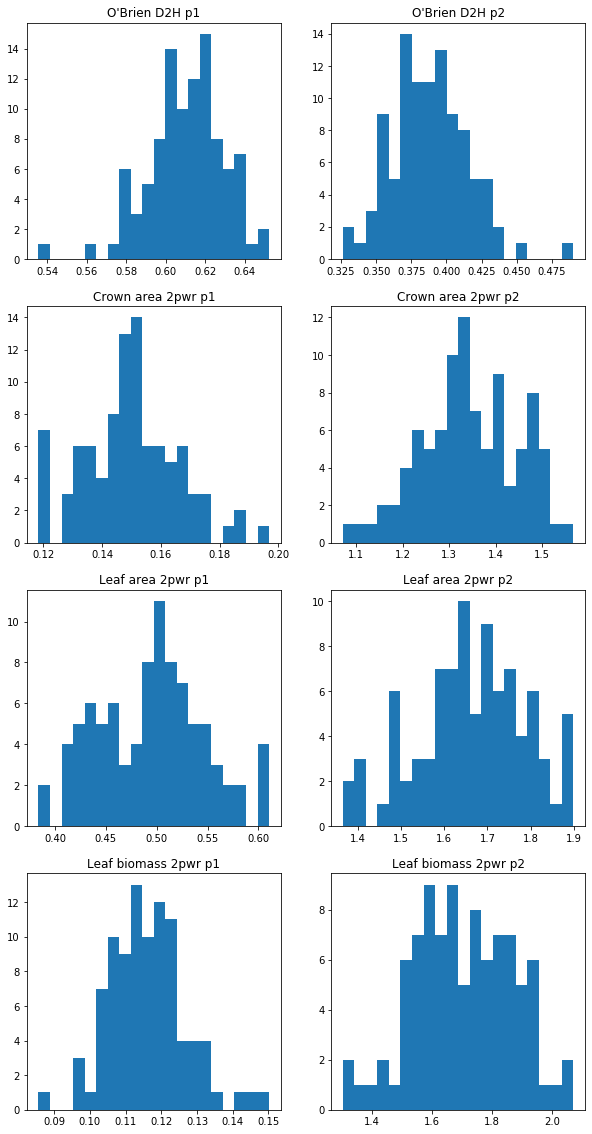

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

axs[0,0].hist(d2h_params['d2h_p1'].values, bins=20)
axs[0,0].set_title("O'Brien D2H p1")
axs[0,1].hist(d2h_params['d2h_p2'].values, bins=20)
axs[0,1].set_title("O'Brien D2H p2")

axs[1,0].hist(d2ca_params['d2ca_p1'].values, bins=20)
axs[1,0].set_title("Crown area 2pwr p1")
axs[1,1].hist(d2ca_params['d2ca_p2'].values, bins=20)
axs[1,1].set_title("Crown area 2pwr p2")

axs[2,0].hist(d2la_params['d2la_p1'].values, bins=20)
axs[2,0].set_title("Leaf area 2pwr p1")
axs[2,1].hist(d2la_params['d2la_p2'].values, bins=20)
axs[2,1].set_title("Leaf area 2pwr p2")

axs[3,0].hist(d2blmax_params['d2blmax_p1'].values, bins=20)
axs[3,0].set_title("Leaf biomass 2pwr p1")
axs[3,1].hist(d2blmax_params['d2blmax_p2'].values, bins=20)
axs[3,1].set_title("Leaf biomass 2pwr p2")

In [14]:
## Create a dataframe with selected paramter variables
## Need to mask out certain value thresholds before combining.
## Mask out SLA >0.08, mask out N/area > 4.0. May be more, just keep that in mind, other lose too much data.

column_names = ['Vcmax','wood_density','SLA', 'N/area', 'leaf_long','bark_sc', 'd2h_p1', 'd2h_p2', 'crown_coef',
               'd2bl_p1', 'd2bl_p2']


vcmax = pd.Series(dat_photo['Vcmax'].dropna(axis=0).values)

wood_density = pd.Series(dat_dens['Wood_density'].dropna(axis=0).values)

#sla = pd.Series(dat_photo['SLA m2/g'].dropna(axis=0).values)
#sla = pd.Series(sla_combine)
sla = pd.Series(sla_mask)

#n_area = pd.Series(dat_photo['Leaf N'].dropna(axis=0).values)
n_area = pd.Series(narea_mask)

#n_leaf = pd.Series(baad_nleaf)

leaf_long = pd.Series(dat_photo['LEAF_LIFE_YR'].dropna(axis=0).values)

bark_sc = pd.Series(dat_fire['bark_scaler'].dropna(axis=0).values)

#p50_node = pd.Series(dat_hydro['p50_node'].dropna(axis=0).values)

#baad_sla = pd.Series(baad_sla)

d2h_p1 = pd.Series(d2h_params['d2h_p1'].dropna(axis=0).values)
d2h_p2 = pd.Series(d2h_params['d2h_p2'].dropna(axis=0).values)

crown_coef = pd.Series(d2la_params['d2la_p1'].dropna(axis=0).values)

#crown_exp_diff = d2ca - d2la

d2bl_p1 = pd.Series(d2blmax_params['d2blmax_p1'].dropna(axis=0).values)
d2bl_p2 = pd.Series(d2blmax_params['d2blmax_p2'].dropna(axis=0).values)


df_tmp = pd.concat([vcmax, wood_density, sla, n_area, leaf_long, bark_sc, d2h_p1, d2h_p2, crown_coef,
                   d2bl_p1, d2bl_p2], axis=1)
df_tmp

vcmax25_indx = 0
wood_density_indx = 1
sla_indx = 2
n_area_indx = 3
lifespan_indx = 4
bark_indx = 5
d2hp1_indx = 6
d2hp2_indx = 7
crown_coef_indx = 8 # crown_to_dbh_coef?
d2blp1_indx = 9 # bleaf_to_dbh_var
d2blp2_indx = 10 # crown_to_dbh_exp


#df = pd.DataFrame({'vcmax': vcmax, 'wood_density': wood_density, 'sla': sla, 'n_area': n_area, 'leaf_long': leaf_long, 'bark_sc': bark_sc, 'p50_node':p50_node}, columns = column_names)
#df = df_tmp.rename(columns={"0" :"Vcmax", "2":"wood_density","3":"SLA","4":"N/area", "5":"leaf_long", "6":"bark_sc", "7":"p50_node"})
df_tmp.columns = column_names
df_tmp
df = df_tmp
df


,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
0,15.060,0.373,0.004310,1.050,13.0,0.020,0.620840,0.378503,0.506888,0.115417,1.936345
1,70.000,0.380,0.009820,3.616,20.0,0.026,0.579212,0.431667,0.536731,0.132144,1.522294
2,76.272,0.383,0.008760,0.900,8.0,0.022,0.610552,0.394389,0.503952,0.111854,1.303754
3,48.720,0.377,0.003362,0.880,8.0,0.028,0.563295,0.453146,0.510180,0.113792,1.541028
4,76.700,0.340,0.004081,1.540,8.0,0.022,0.616419,0.372049,0.506071,0.111651,1.891749
...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,0.008416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,NaN,NaN,0.007140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,0.007611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,0.007432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Not sure if these steps are necessary or how df_tm would be different from df above
traits_matrix = df_tmp
traits_matrix = np.ma.masked_invalid(traits_matrix)

df_tm = pd.DataFrame(traits_matrix, columns=column_names)

In [16]:
df.cov()

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
Vcmax,396.620970,-0.319722,1.647265e-02,8.437796,-21.963021,-0.157186,-2.935372e-02,0.035680,0.376131,-0.022820,-0.961345
wood_density,-0.319722,0.003264,-1.200330e-05,-0.005976,0.003074,0.000056,-2.720622e-04,0.000416,-0.001145,0.000129,-0.000941
SLA,0.016473,-0.000012,1.187093e-04,0.000227,0.002926,-0.000007,-3.871129e-07,0.000001,0.000001,0.000003,-0.000033
N/area,8.437796,-0.005976,2.267161e-04,0.322444,0.306026,-0.002764,2.252886e-04,-0.000324,0.004678,0.000519,-0.020131
leaf_long,-21.963021,0.003074,2.925882e-03,0.306026,14.512654,0.019691,-4.415568e-03,0.007718,-0.022228,0.007866,0.029133
bark_sc,-0.157186,0.000056,-6.759710e-06,-0.002764,0.019691,0.000290,-5.253136e-05,0.000067,-0.000064,0.000020,0.000563
d2h_p1,-0.029354,-0.000272,-3.871129e-07,0.000225,-0.004416,-0.000053,3.736700e-04,-0.000520,-0.000060,0.000021,-0.000137
d2h_p2,0.035680,0.000416,1.306247e-06,-0.000324,0.007718,0.000067,-5.201033e-04,0.000737,0.000108,-0.000035,0.000168
crown_coef,0.376131,-0.001145,1.223893e-06,0.004678,-0.022228,-0.000064,-6.015725e-05,0.000108,0.002748,-0.000082,-0.000730
d2bl_p1,-0.022820,0.000129,2.949569e-06,0.000519,0.007866,0.000020,2.144264e-05,-0.000035,-0.000082,0.000116,0.000137


In [17]:
## Create covariance matrix from mean traits

#trait_cov = df.cov()
#trait_cov
trait_cov = df_tm.cov()
trait_cov

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
Vcmax,396.620970,-0.319722,1.647265e-02,8.437796,-21.963021,-0.157186,-2.935372e-02,0.035680,0.376131,-0.022820,-0.961345
wood_density,-0.319722,0.003264,-1.200330e-05,-0.005976,0.003074,0.000056,-2.720622e-04,0.000416,-0.001145,0.000129,-0.000941
SLA,0.016473,-0.000012,1.187093e-04,0.000227,0.002926,-0.000007,-3.871129e-07,0.000001,0.000001,0.000003,-0.000033
N/area,8.437796,-0.005976,2.267161e-04,0.322444,0.306026,-0.002764,2.252886e-04,-0.000324,0.004678,0.000519,-0.020131
leaf_long,-21.963021,0.003074,2.925882e-03,0.306026,14.512654,0.019691,-4.415568e-03,0.007718,-0.022228,0.007866,0.029133
bark_sc,-0.157186,0.000056,-6.759710e-06,-0.002764,0.019691,0.000290,-5.253136e-05,0.000067,-0.000064,0.000020,0.000563
d2h_p1,-0.029354,-0.000272,-3.871129e-07,0.000225,-0.004416,-0.000053,3.736700e-04,-0.000520,-0.000060,0.000021,-0.000137
d2h_p2,0.035680,0.000416,1.306247e-06,-0.000324,0.007718,0.000067,-5.201033e-04,0.000737,0.000108,-0.000035,0.000168
crown_coef,0.376131,-0.001145,1.223893e-06,0.004678,-0.022228,-0.000064,-6.015725e-05,0.000108,0.002748,-0.000082,-0.000730
d2bl_p1,-0.022820,0.000129,2.949569e-06,0.000519,0.007866,0.000020,2.144264e-05,-0.000035,-0.000082,0.000116,0.000137


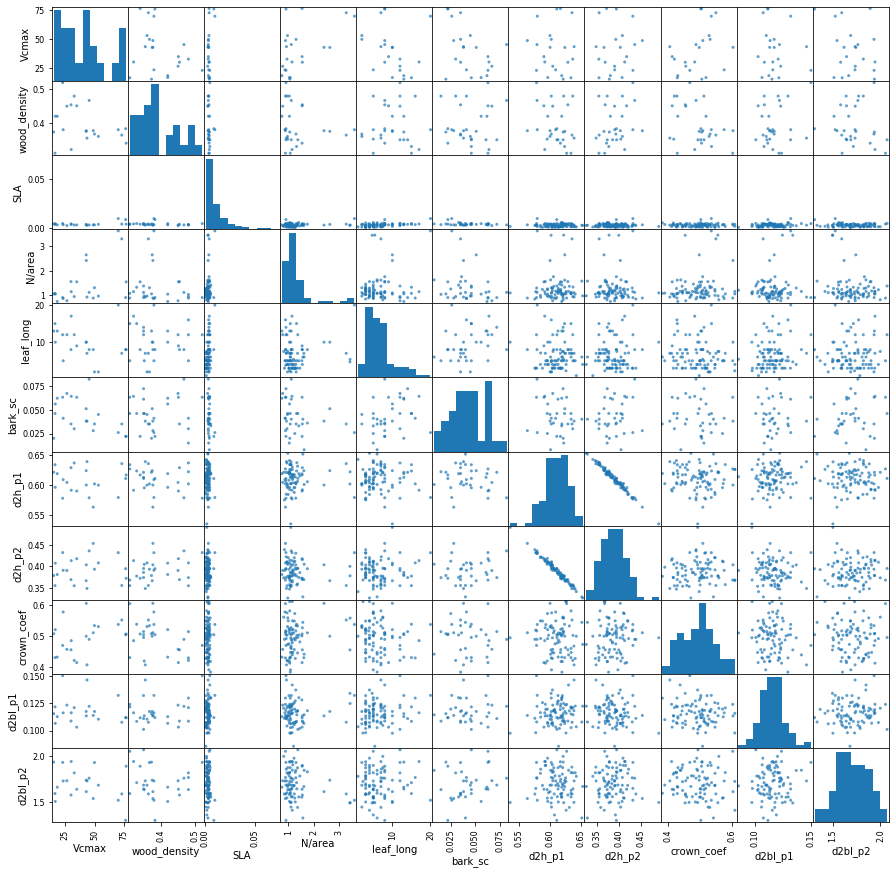

In [18]:
pd.plotting.scatter_matrix(df_tm, alpha=0.7, figsize=(15,15), diagonal='hist')
plt.show()

In [19]:
df.describe()

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
count,22.000000,30.000000,646.000000,86.000000,91.000000,37.000000,100.000000,100.000000,90.000000,93.000000,93.000000
mean,40.301981,0.390867,0.010738,1.279058,6.562422,0.042595,0.610335,0.388494,0.494413,0.116206,1.705790
std,19.915345,0.057132,0.010895,0.567841,3.809548,0.017029,0.019331,0.027147,0.052422,0.010781,0.164164
min,15.060000,0.310000,0.000820,0.740000,1.000000,0.008000,0.535714,0.326268,0.383682,0.085589,1.303754
25%,23.937500,0.350500,0.004151,0.997500,4.000000,0.033000,0.600394,0.371649,0.455084,0.108532,1.590460
50%,38.695000,0.376000,0.007189,1.110000,5.000000,0.040000,0.612213,0.385655,0.499508,0.115746,1.699723
75%,49.507500,0.442500,0.012640,1.315000,8.000000,0.056000,0.622018,0.405417,0.526461,0.122283,1.825739
max,76.700000,0.520000,0.072946,3.616000,20.000000,0.082000,0.652188,0.490332,0.610401,0.150199,2.070069


#### Calculate syntehtic traits dataset. Some traits normally distributed and some lognormally distributed

In [20]:
shape_out = [2,100]
n_out = np.zeros(shape_out).size
randomstate = np.random.RandomState(11)


partially_log_traits_matrix = traits_matrix.copy()

# Lognormal distribution for SLA, N area, and leaf long 
columns_log = [2,3,5]
for i in range(len(columns_log)):
    partially_log_traits_matrix[:,columns_log[i]] = np.ma.log(partially_log_traits_matrix[:,columns_log[i]])
#partially_log_traits_matrix[:,columns_log[2]] = np.ma.log(partially_log_traits_matrix[:, columns_log[2]])
#partially_log_traits_matrix[:,columns_log[3]] = np.ma.log(partially_log_traits_matrix[:, columns_log[3]])
#partially_log_traits_matrix[:,columns_log[5]] = np.ma.log(partially_log_traits_matrix[:, columns_log[5]])

partially_log_cov = np.ma.cov(partially_log_traits_matrix.transpose())
partially_log_means = partially_log_traits_matrix.mean(axis=0)


In [21]:
# Check that the correct columns were log transformed
partially_log_traits_matrix[:,2]

masked_array(data=[-5.446737331666311, -4.623334156615763,
                   -4.737559374033837, -5.695307885639913,
                   -5.501393374678988, -5.7889404429965206,
                   -5.539923049024965, -5.484826719934267,
                   -5.772775381857439, -5.562934166068821,
                   -5.693070750568125, -5.615279685374984,
                   -5.539115853100967, -5.708031488945616,
                   -5.7199118565860845, -5.738280756063798,
                   -5.939213711309569, -5.355946479384673,
                   -5.688962830057923, -5.3792237804417615,
                   -5.56290810777642, -5.4509558569768926,
                   -5.5496289376901675, -5.543144312693405,
                   -5.469200591201162, -5.562282912382502,
                   -5.336060771458694, -5.352393476746708,
                   -5.616761097716571, -5.621087901672312,
                   -5.679080106015859, -5.201608165830004,
                   -5.452471379714184, -5.3395144313

In [22]:
traits_matrix[:,2]

masked_array(data=[0.004310345, 0.00982, 0.008759999999999999,
                   0.0033617020000000003, 0.004081080999999999,
                   0.0030612240000000004, 0.003926829000000001,
                   0.004149254000000001, 0.0031111109999999997, 0.0038375,
                   0.003369231, 0.0036417909999999997,
                   0.0039299999999999995, 0.0033192, 0.00328, 0.0032203,
                   0.0026341, 0.00472, 0.0033830999999999996, 0.0046114,
                   0.0038375999999999996, 0.0042921999999999995,
                   0.0038889000000000003, 0.0039142, 0.0042146,
                   0.0038399999999999997, 0.0048148, 0.0047368,
                   0.0036364000000000006, 0.0036207, 0.0034167, 0.0055077,
                   0.0042857, 0.0047982, 0.0040227, 0.005758600000000001,
                   0.0029434, 0.0047181, 0.00328, 0.0028325, 0.0045105,
                   0.0039312309999999994, 0.0012709239999999999,
                   0.001190512, 0.001481065, 0.0016070

(20000, 12)


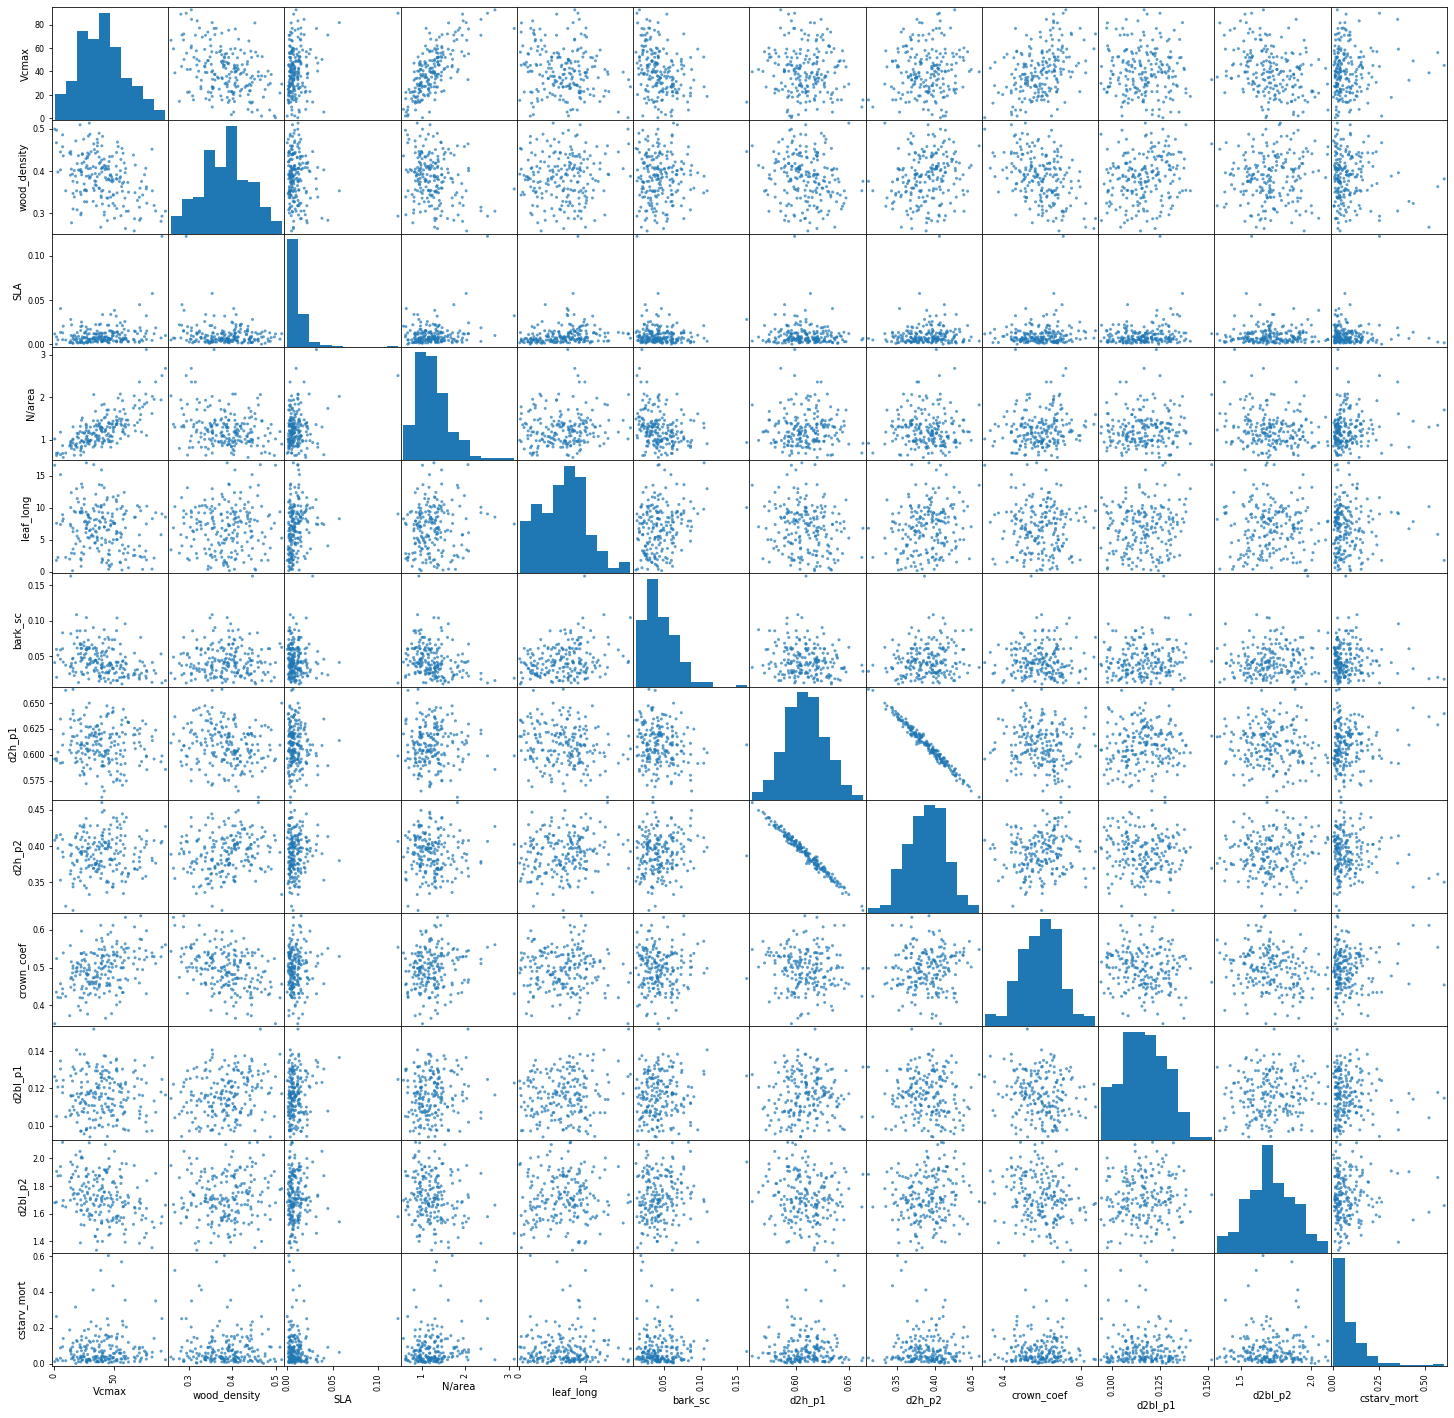

In [23]:
### these next sets of trait distributions are all completely made up.  

max_mort_rate_cstarve_mean = 0.05
max_mort_rate_cstarve_log_variance = (1.)**2
max_mort_rate_cstarve_indx = 11
if not max_mort_rate_cstarve_indx in columns_log:
    columns_log.append(max_mort_rate_cstarve_indx)



ntraits_total = 12
full_trait_cov_matrix = np.zeros([ntraits_total,ntraits_total])

# we are using the partially log-transformed traits covariance matrix now
#full_trait_cov_matrix[0:3,0:3] = partially_log_cov[:]
full_trait_cov_matrix[0:11,0:11] = partially_log_cov[:]

#full_trait_cov_matrix[mortality_indx,mortality_indx] = mortality_variance
#full_trait_cov_matrix[bleaf_to_dbh_indx,bleaf_to_dbh_indx] = bleaf_to_dbh_variance
#full_trait_cov_matrix[fineroot_to_leaf_indx,fineroot_to_leaf_indx] = fineroot_to_leaf_variance
#full_trait_cov_matrix[npp_repro_indx,npp_repro_indx] = npp_repro_variance
full_trait_cov_matrix[max_mort_rate_cstarve_indx,max_mort_rate_cstarve_indx] = max_mort_rate_cstarve_log_variance



means_total = np.zeros(ntraits_total)
# we are using the partially log-transformed traits covariance matrix now
means_total[0:11] = partially_log_means[:]

#means_total[bleaf_to_dbh_indx] = bleaf_to_dbh_mean
#means_total[fineroot_to_leaf_indx] = fineroot_to_leaf_mean
#means_total[npp_repro_indx] = npp_repro_mean
means_total[max_mort_rate_cstarve_indx] = np.log(max_mort_rate_cstarve_mean)

backup_factor = 100
X_total = randomstate.multivariate_normal(means_total, np.array(full_trait_cov_matrix), n_out)
X_total_backup = randomstate.multivariate_normal(means_total, np.array(full_trait_cov_matrix), n_out*backup_factor)

#since we have log-transformed some of the traits data, need to get back to raw values
for i in range(len(columns_log)):
    X_total[:,columns_log[i]] = np.exp(X_total[:,columns_log[i]])
    X_total_backup[:,columns_log[i]] = np.exp(X_total_backup[:,columns_log[i]])


### all of these variables are positive definite.  go through them and check each row to make sure that all values
### in the row are positive.  if not, replace the entire row with one from a backup array.

### in addition, we need to ensure that the LAI of a tree with the maximum allowable SLA does not have an LAI 
### that exceeds the array sizes (dinc * nlevleaf) given to it.  pre-calculate the LAI of each ensemble member and 
### exclude trait combination draws that will exceed this value

carbon_fraction_mean = .4482  ## mean of leaf samples in norby dataset
sai_to_lai_ratio = 0.1
slamax_to_slatop = 2.0
max_allowable_lai = 30.  #(assuming a dinc of 1 and a nlevleaf of 30)

print(X_total_backup.shape)

backup_copy = -1
for i in range(n_out):
    if X_total[i,:].min() <= 0 or ((slamax_to_slatop*(X_total[i,sla_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,d2blp1_indx]/X_total[i,crown_coef_indx]) > max_allowable_lai:
        replacement_found = False
        backup_copy = backup_copy + 1
        #print('replacing '+str(i)+', '+str(X_total[i,:].min())+', '+str(((slamax_to_slatop/(X_total[i,lma_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,bleaf_to_dbh_indx]/X_total[i,crown_to_dbh_coef_indx])))
        while not replacement_found:
            if X_total_backup[backup_copy,:].min() > 0 and ((slamax_to_slatop*(X_total_backup[backup_copy,sla_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total_backup[backup_copy,d2blp1_indx]/X_total_backup[backup_copy,crown_coef_indx]) <= max_allowable_lai:
                replacement_found = True
            else:
                backup_copy = backup_copy + 1
                if backup_copy >= n_out*backup_factor -1:
                    backup_copy = 0
                    X_total_backup = randomstate.multivariate_normal(means_total, np.array(full_trait_cov_matrix), n_out*backup_factor)
                    for j in range(len(columns_log)):
                        X_total_backup[:,columns_log[j]] = np.exp(X_total_backup[:,columns_log[j]])
        X_total[i,:] = X_total_backup[backup_copy,:]
    #print('keeping '+str(i)+', '+str(X_total[i,:].min())+', '+str(((slamax_to_slatop/(X_total[i,lma_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,bleaf_to_dbh_indx]/X_total[i,crown_to_dbh_coef_indx])))
column_names_full = ['Vcmax','wood_density','SLA', 'N/area', 'leaf_long','bark_sc', 'd2h_p1', 'd2h_p2', 'crown_coef',
               'd2bl_p1', 'd2bl_p2', 'cstarv_mort']
df4 = pd.DataFrame(X_total, columns=column_names_full)
pd.plotting.scatter_matrix(df4, alpha=0.7, figsize=(25, 25), diagonal='hist')
plt.show()

#### now we want to write this full set of parameters to a set of fates netcdf parameter files, which we'll use to generate an ensemble of FATES runs.

In [24]:
### 
import netCDF4 as nc4
import sys
import os
import shutil

print(X_total.shape)

def copy_clobber(filename1, filename2):
    try:
        os.remove(filename2)
        print('replacing file: '+filename2)
    except:
        print('file does not yet exist: '+filename2)
    shutil.copyfile(filename1, filename2)

(200, 12)


In [25]:
filename_template = 'param_file_1PFT_20210327.nc'
filename_output_basename = 'param_file_1PFT_exp1_'

In [26]:
#for i in range(n_out/shape_out[0]):
for i in range(100):
    filename_out = filename_output_basename+str(i+1).zfill(4)+'_c210802.nc'
    copy_clobber(filename_template,filename_out)
    fin = nc4.Dataset(filename_out, 'r+')
    #
    vcmax25var = fin.variables['fates_leaf_vcmax25top']
    vcmax25var[:] = X_total[i*shape_out[0],vcmax25_indx].squeeze() # for 1 PFT
    #vcmax25var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],vcmax25_indx].squeeze() # for 2 PFTs
    #
    wood_density_var = fin.variables['fates_wood_density']
    wood_density_var[:] = X_total[i*shape_out[0],wood_density_indx].squeeze()
    #wood_density_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],wood_density_indx].squeeze()
    #
    slatopvar = fin.variables['fates_leaf_slatop']
    #slatopvar[:] = 1./(X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx] * carbon_fraction_mean).squeeze()
    slatopvar[:] = (X_total[i*shape_out[0],sla_indx] * carbon_fraction_mean).squeeze()
    #slatopvar[:] = (X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx] * carbon_fraction_mean).squeeze()
    #
    ### try making the maximum SLA (i.e. at the base of the canopy) equal to the top of the canopy value (i.e. turn off SLA scaling)
    slamaxvar = fin.variables['fates_leaf_slamax']
    #slamaxvar[:] = slamax_to_slatop/(X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx].squeeze() * carbon_fraction_mean)
    slamaxvar[:] = slamax_to_slatop*(X_total[i*shape_out[0],sla_indx].squeeze() * carbon_fraction_mean)
    #slamaxvar[:] = slamax_to_slatop*(X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx].squeeze() * carbon_fraction_mean)
    #
    leafcnvar = fin.variables['fates_prt_nitr_stoich_p1']
    #leafcnvar[0,:] = 1./(carbon_fraction_mean * X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx].squeeze() / X_total[i*shape_out[0]:(i+1)*shape_out[0],n_area_indx].squeeze())
    leafcnvar[0,:] = (carbon_fraction_mean * X_total[i*shape_out[0],sla_indx].squeeze() / X_total[i*shape_out[0],n_area_indx].squeeze())
    #leafcnvar[0,:] = (carbon_fraction_mean * X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx].squeeze() / X_total[i*shape_out[0]:(i+1)*shape_out[0],n_area_indx].squeeze())
    #
    leaflongvar = fin.variables['fates_leaf_long']
    leaflongvar[:] = X_total[i*shape_out[0],lifespan_indx].squeeze()
    #leaflongvar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],lifespan_indx].squeeze()
    #
    barkscalevar = fin.variables['fates_fire_bark_scaler']
    barkscalevar[:] = X_total[i*shape_out[0],bark_indx].squeeze()
    #barkscalevar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],bark_indx].squeeze()
    #
    #bmortvar = fin.variables['fates_mort_bmort']
    #bmortvar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],mortality_indx].squeeze()
    #
    d2h1var = fin.variables['fates_allom_d2h1']
    d2h1var[:] = X_total[i*shape_out[0],d2hp1_indx].squeeze()
    #d2h1var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2hp1_indx].squeeze()
    #
    d2h2var = fin.variables['fates_allom_d2h2']
    d2h2var[:] = X_total[i*shape_out[0],d2hp2_indx].squeeze()
    #d2h2var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2hp2_indx].squeeze()
    #
    crown_to_dbh_coef_var1 = fin.variables['fates_allom_d2ca_coefficient_min']
    crown_to_dbh_coef_var2 = fin.variables['fates_allom_d2ca_coefficient_max']
    crown_to_dbh_coef_var1[:] = X_total[i*shape_out[0],crown_coef_indx].squeeze()
    crown_to_dbh_coef_var2[:] = X_total[i*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var1[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var2[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],crown_coef_indx].squeeze()
    #
    crown_to_dbh_exponent_var = fin.variables['fates_allom_d2bl2']
    crown_to_dbh_exponent_var[:] = X_total[i*shape_out[0],d2blp2_indx].squeeze()
    #crown_to_dbh_exponent_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2blp2_indx].squeeze()
    #
    bleaf_to_dbh_var = fin.variables['fates_allom_d2bl1']
    bleaf_to_dbh_var[:] = X_total[i*shape_out[0],d2blp1_indx].squeeze()
    #bleaf_to_dbh_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2blp1_indx].squeeze()
    #
    #fineroot_to_leaf_var = fin.variables['fates_allom_l2fr']
    #fineroot_to_leaf_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],fineroot_to_leaf_indx].squeeze()
    #
    #npp_reprovar = fin.variables['fates_seed_alloc']
    #npp_reprovar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],npp_repro_indx].squeeze()
    #
    max_mort_rate_cstarvevar = fin.variables['fates_mort_scalar_cstarvation']
    max_mort_rate_cstarvevar[:] = X_total[i*shape_out[0],max_mort_rate_cstarve_indx].squeeze()
    #max_mort_rate_cstarvevar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],max_mort_rate_cstarve_indx].squeeze()
    #
    
     ## update a few other parameters from the default. 
    # background mortality
    bmortvar = fin.variables['fates_mort_bmort']
    bmortarr = np.array([0.0075])
    bmortvar[:] = bmortarr.squeeze()
    # initial recruitment density
    initdvar = fin.variables['fates_recruit_initd']
    initdarr = np.array([0.08])
    initdvar[:] = initdarr.squeeze()
    # soil matric potential stomatal closure (SMPSC)? not sure if needed but may be helpful?
    #smpscvar = fin.variables['fates_smpsc']
    #smpscarr = np.array([-330898]) # the mean of the min and max from PBuotte pine and cedar min-max
    #smpscvar[:] =  smpscarr.squeeze() 
    
    
    fin.close()


file does not yet exist: param_file_1PFT_exp1_0001_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0002_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0003_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0004_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0005_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0006_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0007_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0008_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0009_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0010_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0011_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0012_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0013_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0014_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0015_c210802.nc
file does not yet exist: param_file_1PFT_exp1_0016_c210802.nc
file doe